#  SOLUTION BDD PostGreSQL REQUETES API OMDB

### LIBRAIRIES A IMPORTER

In [1]:
# Librairie requests pour envoyer des requêtes HTTP
import requests
# Librairie Os pour les chemins de fichiers et variables d'environnement
import os
# Librairie json pour créer et lire le format json
import json
# Lien au fichier Python pour exécuter ses fonctions
import postgreSQL_functions

### CONNEXION A LA BASE DE DONNEES PGADMIN

In [2]:
# Spécifier le nom de la base de données créée au préalable dans PgAdmin
ma_base_donnees = "Floupics_API"
utilisateur = "postgres"

# Méthode os.environ.get pour utiliser le mot de passe 
# enregistré au préalable dans une variable d'environnement
mot_passe = os.environ.get('pg_psw') 

# Fonction conn appelle la fonction ouvrir_connexion du fichier annexe Python
conn = postgreSQL_functions.ouvrir_connection(ma_base_donnees, utilisateur, mot_passe)

### CREATION TABLE

In [3]:
# Fonction SQL paramétres de la table movies
sql_creation_table_movies = """
    CREATE TABLE IF NOT EXISTS movies (
    movieId VARCHAR primary key,
    Title VARCHAR,
    Year VARCHAR,
    Released VARCHAR,
    Runtime VARCHAR,
    Genre VARCHAR,
    Director VARCHAR,
    Writer VARCHAR,
    Actors VARCHAR,
    Language VARCHAR,
    Country VARCHAR,
    Type VARCHAR,
    Plot VARCHAR,
    Poster VARCHAR
    ); 
"""

In [4]:
# Création table movies avec appelle de la fonction creer table fichier py
postgreSQL_functions.creer_table(conn, sql_creation_table_movies)

La table a été crée avec succès


### REQUETE OMDB API / CREATION DE LISTE POUR LA TABLE MOVIES

In [6]:
# Fonction SQL paramétres insersion données dans la table movies
sql_inserer_movies_dict = """
    INSERT INTO movies 
    (movieId, Title, Year, Released, Runtime, Genre, Director, Writer, 
    Actors, Language, Country, Type, Plot, Poster)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
"""

In [7]:
# Insersion données table movies avec appelle de la fonction inserer_donnees fichier py
postgreSQL_functions.inserer_donnees(conn, sql_inserer_movies_dict, data)

Les données ont été insérées avec succès


### AFFICHAGE DES DONNEES AVEC JINJA FORMAT HTML

### Création de la variable data : données actuelles de la BDD

In [8]:
sql_lire_movies = """
    SELECT *
    FROM movies;
"""

In [9]:
data = postgreSQL_functions.lire_donnees(conn, sql_lire_movies)

Les données ont été lues avec succès


In [10]:
print(data)

[('tt3000114', '5:00 ning gatpanapun', '2012', 'N/A', '11 min', 'Short, Drama', 'Petersen Vargas', 'Petersen Vargas', "Jerome Baluyut, Issa D'Bayan, Therese Lim, Thomas Lim", 'Filipino', 'Philippines', 'movie', 'A boy and girl meet in the middle of a public cemetery for the first time.', 'https://m.media-amazon.com/images/M/MV5BOTcwNjk0MmEtZmRhMS00ZTVjLWI4NmQtNzE0YTU0YzFmZWQwXkEyXkFqcGdeQXVyNTI3MjA4MjA@._V1_SX300.jpg'), ('tt3000118', 'The Buffalo Kid', '2013', '01 Jun 2013', '19 min', 'Short, Drama, Music', 'Pedro Marnoto Pereira', 'Pedro Marnoto Pereira (story), Pedro Marnoto Pereira', 'Bryn Carter, Kate Costello, Karen Lynn Gorney, Kat McAfee', 'English', 'USA', 'movie', "Still haunted by the pain left by his lover's departure, a young trumpet player plays his sorrows away by a street corner in New York. But when he can no longer find the motivation to make ...", 'N/A'), ('tt3000128', 'Blind Spot', '2013', '02 Jul 2013', '10 min', 'Short, Drama', 'Mohamed Albardooli', 'Noor Alwan (sc

### CREATION ET IMPLEMENTATION DES FICHIERS HTML 

In [11]:
import jinja2
from jinja2 import Environment, FileSystemLoader

In [12]:
def affiche_html(data):    
    root = os.path.dirname(os.path.abspath("__file__"))
    templates_dir = os.path.join(root, 'Templates')
    env = Environment( loader = FileSystemLoader(templates_dir) )
    template = env.get_template('index.html')    
    filename = os.path.join(root, 'generate', 'html', 'index.html')
    
    with open(filename, 'w') as fh:
        fh.write(template.render(
            h1 = "Liste films",
            mydata = data
        ))

### Format html mis en place dans fichier html dossier tempplates

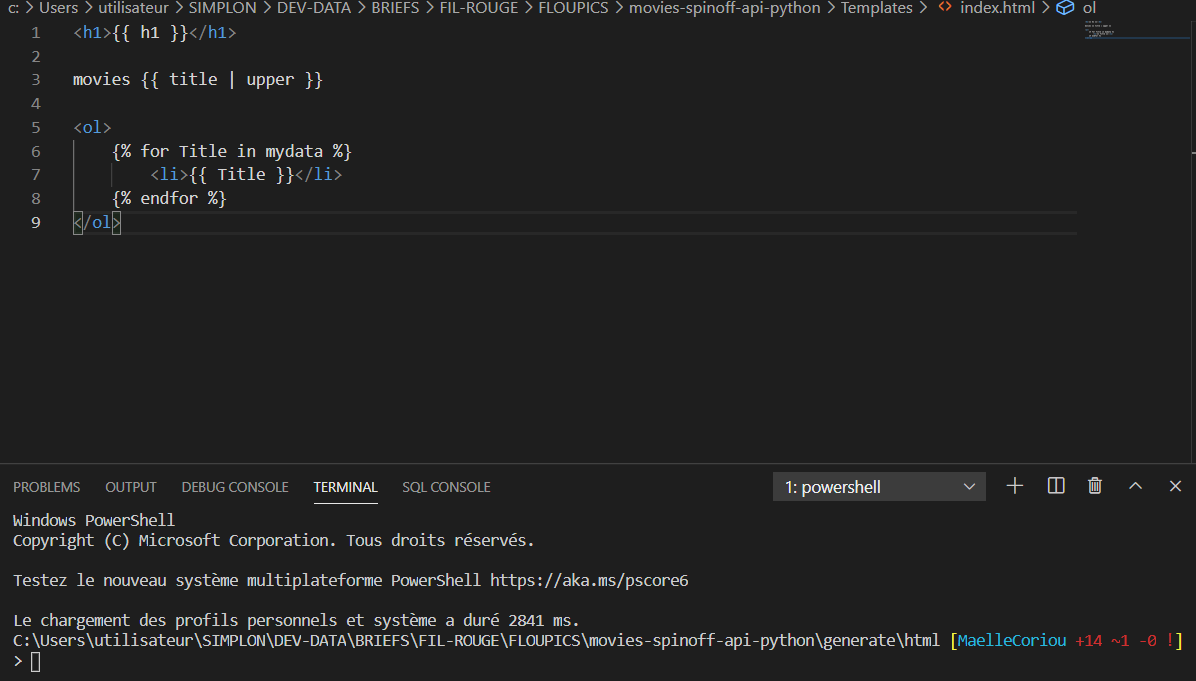

In [13]:
from IPython.display import Image
Image('Pics/Index-html-templates.png')

### Données implémentées dans le fichier html dossier generated

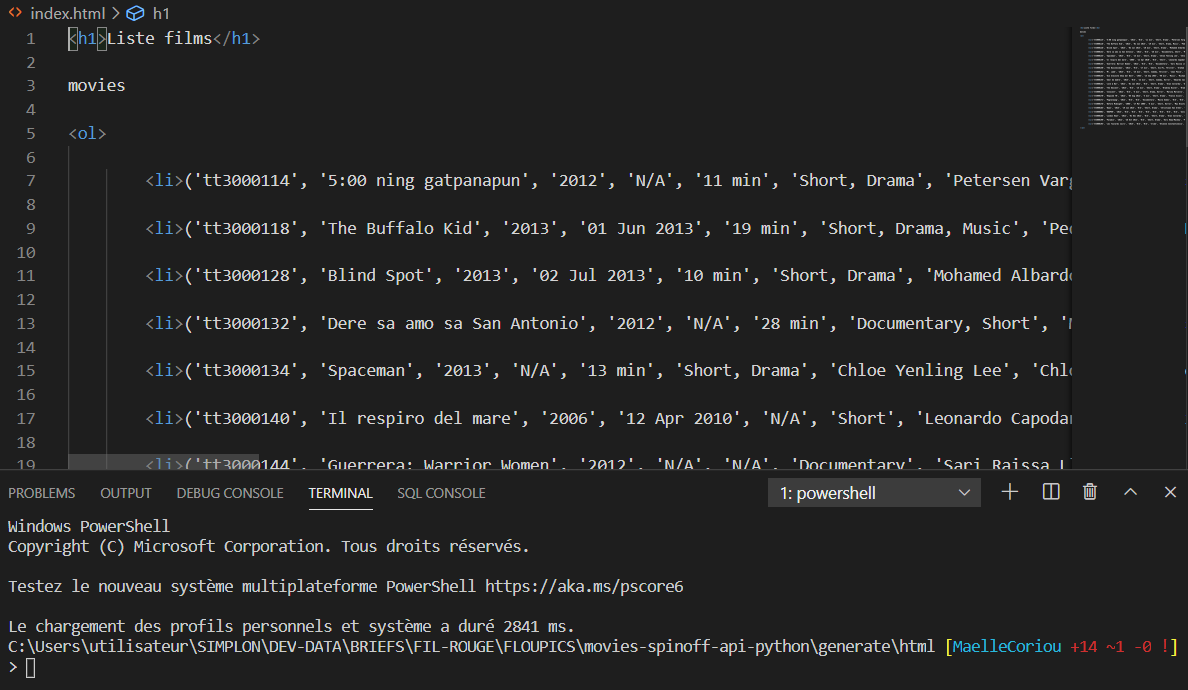

In [14]:
from IPython.display import Image
Image('Pics/Index-html-generated.png')

### Rendu html des données

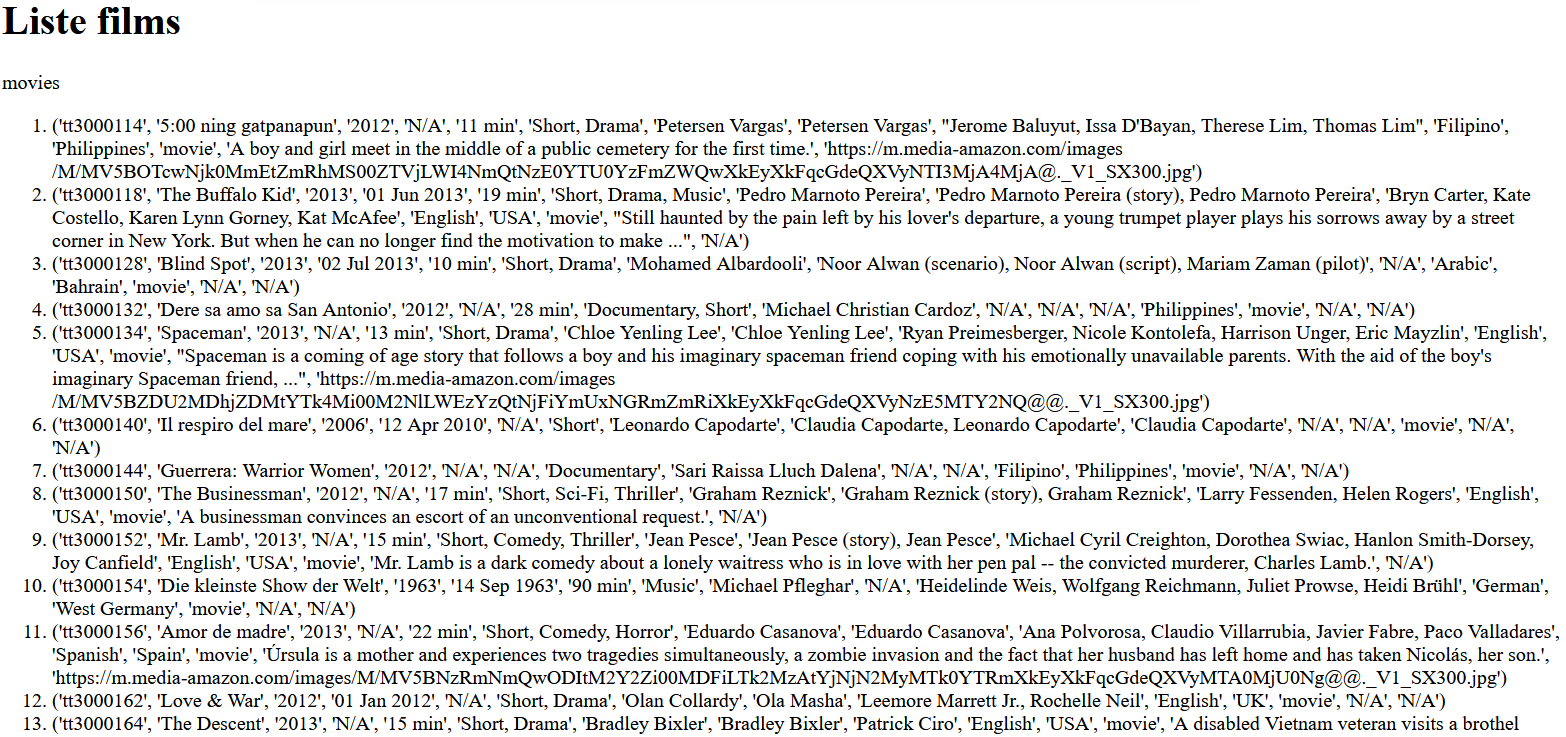

In [15]:
from IPython.display import Image
Image('Pics/Rendu-Liste-Film.png')